In [1]:
import numpy as np
import scipy.linalg
import sympy as sym
import matplotlib.pyplot as plt

# Exercise 1

Dot product of residuals and predictions: -0.00000000000727595761
Correlation of residuals and predictions: 0.00000000000000102250


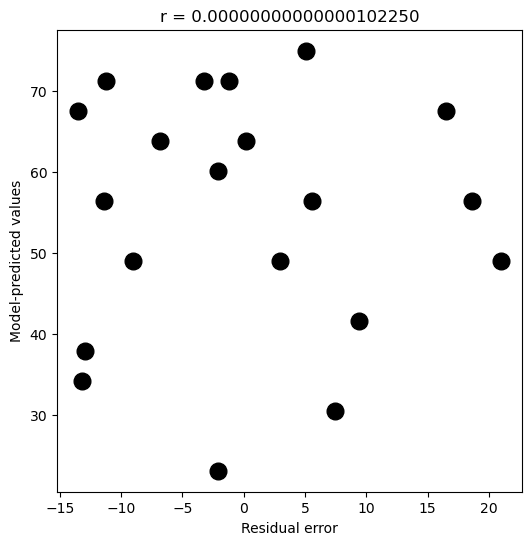

In [2]:
numcourses = [13,4,12,3,14,13,12,9,11,7,13,11,9,2,5,7,10,0,9,7]
happiness  = [70,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,70]
X = np.array(numcourses).reshape(len(numcourses), 1)
X = np.hstack((np.ones((20,1)), X))

beta = np.linalg.inv(X.T @ X) @ X.T @ happiness
pred_happiness = X @ beta
res = happiness - pred_happiness

print(f"Dot product of residuals and predictions: {np.dot(pred_happiness, res):.20f}")
print(f"Correlation of residuals and predictions: {np.corrcoef(pred_happiness, res)[0,1]:.20f}")
plt.figure(figsize = (6,6))
plt.plot(res, pred_happiness, "ko", markersize = 12)
plt.xlabel("Residual error")
plt.ylabel("Model-predicted values")
plt.title(f"r = {np.corrcoef(pred_happiness,res)[0,1]:.20f}")
plt.savefig('Figure_11_06.png',dpi=300)
plt.show()

# Exercise 2

In [3]:
M = np.hstack((X, res.reshape(20,1)))
M_rank = np.linalg.matrix_rank(M)
X_rank = np.linalg.matrix_rank(X)
print(f"Predictor matrix rank: {X_rank}")
print(f"Rank after augmented with residual vectors: {M_rank}")

Predictor matrix rank: 2
Rank after augmented with residual vectors: 3


Because the rank of the matrix goes from 2 to 3 when augmented with the residuals, this means that the vector of residuals is not in the column space of the original matrix, i.e. regardless of beta choice, there will always be error.

In [4]:
# Alternate solution
nullspace = scipy.linalg.null_space(X.T)
nullspaceAugment = np.hstack( (nullspace,res.reshape(-1,1)) )
print(f'dim(  N(X)    ) = {np.linalg.matrix_rank(nullspace)}')
print(f'dim( [N(X)|r] ) = {np.linalg.matrix_rank(nullspaceAugment)}')

dim(  N(X)    ) = 18
dim( [N(X)|r] ) = 18


# Exercise 3

Method 3 summary
- $X \beta = y \implies QR \beta = y \implies R \beta = Q^{\prime}y$
- Because R is upper triangular and $Q^{\prime}y$ is a 1xm matrix, you can solve for beta by making an augmented matrix and performing backsubstitution

In [5]:
m, n = 20, 3
X = np.random.randn(m,n)
happiness = np.random.randn(m,1)
X = np.hstack((np.ones(20).reshape(20,1), X))
beta_1 = np.linalg.inv(X.T @ X) @ X.T @ happiness

# via QR, inverting R
Q, R = np.linalg.qr(X)
beta_2 = np.linalg.inv(R) @ Q.T @ happiness

# via QR, row reducing
tmp = (Q.T @ happiness).reshape(-1,1)
raug = np.hstack((R, tmp))
raug_r = sym.Matrix(raug).rref()[0]
beta_3 = np.array(raug_r[:,-1])

print(beta_1)
print(beta_2)
print(beta_3)

[[-0.40148463]
 [ 0.0368231 ]
 [ 0.20778867]
 [ 0.37199714]]
[[-0.40148463]
 [ 0.0368231 ]
 [ 0.20778867]
 [ 0.37199714]]
[[-0.401484627145032]
 [0.0368231034912206]
 [0.207788666365827]
 [0.371997141274801]]


In [6]:
# show the matrices
print('Matrix R:')
print(np.round(R,3))

print(' ')
print("Matrix R|Q'y:")
print(np.round(raug,3))

print(' ')
print("Matrix RREF(R|Q'y):")
print(np.round(np.array(raug_r).astype(float),3))

Matrix R:
[[-4.472 -0.029 -1.425 -0.543]
 [ 0.     3.873  0.713  1.61 ]
 [ 0.     0.     3.862  0.526]
 [ 0.     0.     0.    -3.732]]
 
Matrix R|Q'y:
[[-4.472 -0.029 -1.425 -0.543  1.296]
 [ 0.     3.873  0.713  1.61   0.89 ]
 [ 0.     0.     3.862  0.526  0.998]
 [ 0.     0.     0.    -3.732 -1.388]]
 
Matrix RREF(R|Q'y):
[[ 1.     0.     0.     0.    -0.401]
 [ 0.     1.     0.     0.     0.037]
 [ 0.     0.     1.     0.     0.208]
 [ 0.     0.     0.     1.     0.372]]


# Exercise 4

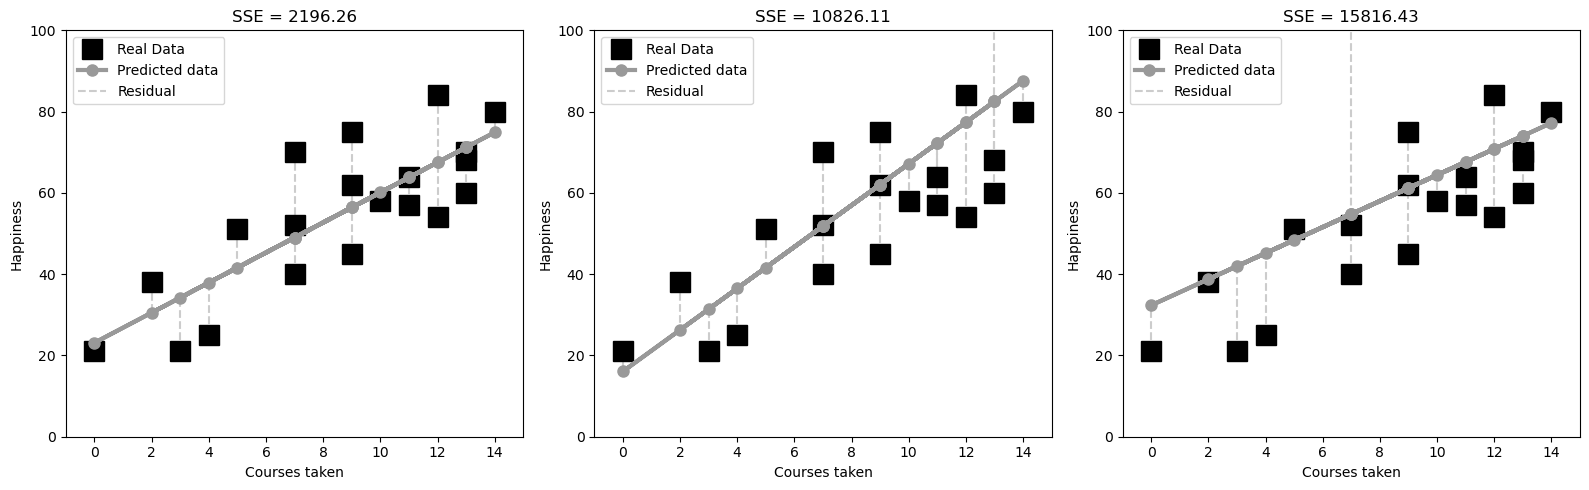

In [7]:
# Happiness with errors
happiness  = [70,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,70]
happiness_e1 = [170,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,70]
happiness_e2 = [70,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,170]

X = np.hstack((np.ones((20,1)),np.array(numcourses).reshape(20,1)))
X_leftinv = np.linalg.inv(X.T @ X) @ X.T

fig, ax = plt.subplots(1, 3, figsize = (16,5))
for axi, y in zip(ax, [happiness, happiness_e1, happiness_e2]):
    beta = X_leftinv @ y
    pred_happiness = X @ beta
    axi.plot(numcourses, y, "ks", markersize = 15)
    axi.plot(numcourses, pred_happiness, "o-", color = [0.6]*3, linewidth = 3, markersize = 8)
    for n, yy, yhat in zip(numcourses, y, pred_happiness):
        axi.plot([n,n], [yy,yhat], "--", color = [0.8]*3, zorder = -10)
    axi.set(xlabel = "Courses taken", ylabel = "Happiness", 
            xlim = [-1, 15], ylim = [0, 100], xticks = range(0, 15, 2))
    axi.legend(["Real Data", "Predicted data", "Residual"])
    axi.set_title(f"SSE = {np.sum((pred_happiness - y)**2):.2f}")
    
plt.tight_layout()
plt.savefig('Figure_11_07.png',dpi=300)
plt.show()

- Notice that the outlier causes different levels of error because of the leverage of each point

# Exercise 5
- For this exercise, notice that we can find the inverse of a matrix by finding the least squares projection of a data matrix onto the identity matrix

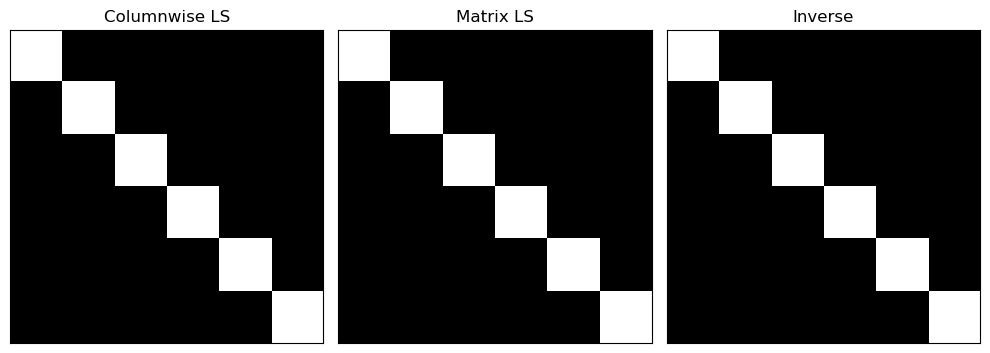

In [8]:
n = 6
X = np.random.randn(n, n)
Y = np.eye(n)

x_i1 = np.zeros_like(X)
for c in range(n):
    x_i1[:,c] = np.linalg.inv(X.T @ X) @ X.T @ Y[:,c]
    
x_i2 = np.linalg.inv(X.T @ X) @ X.T @ Y

x_i3 = np.linalg.inv(X)

fig, ax = plt.subplots(1, 3, figsize = (10,6))
ax[0].imshow(x_i1 @ X, cmap = "gray")
ax[0].set_title("Columnwise LS")
ax[1].imshow(x_i2 @ X, cmap = "gray")
ax[1].set_title("Matrix LS")
ax[2].imshow(x_i3 @ X, cmap = "gray")
ax[2].set_title("Inverse")
for a in ax: a.set(xticks=[], yticks=[])
plt.tight_layout()
plt.savefig('Figure_11_08.png',dpi=300)
plt.show()

In [9]:
print(x_i1 - x_i2)
print(x_i1 - x_i3)
print(x_i2 - x_i3)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[[ 0.00000000e+00  3.33066907e-16  4.16333634e-17 -4.99600361e-16
   3.33066907e-16 -1.66533454e-16]
 [-1.11022302e-16 -1.11022302e-16 -3.33066907e-16  7.21644966e-16
  -2.22044605e-16  1.11022302e-16]
 [ 2.22044605e-16  5.55111512e-17 -1.11022302e-16  1.49186219e-16
   0.00000000e+00 -6.33174069e-17]
 [-2.77555756e-17 -5.55111512e-17 -1.11022302e-16  6.59194921e-17
  -5.55111512e-17  5.55111512e-17]
 [ 2.77555756e-16  3.33066907e-16  3.05311332e-16 -6.66133815e-16
   8.88178420e-16 -3.88578059e-16]
 [-3.33066907e-16 -3.33066907e-16 -5.55111512e-17  6.10622664e-16
  -6.66133815e-16  3.88578059e-16]]
[[ 0.00000000e+00  3.33066907e-16  4.16333634e-17 -4.99600361e-16
   3.33066907e-16 -1.66533454e-16]
 [-1.11022302e-16 -1.11022302e-16 -3.33066907e-16  7.21644966e-16
  -2.22044605e-16  1.11022302e-16]
 [ 2.22044605e-16  5.55111512e-17 -1.11022302e-16  1.49186219e-1